In [1]:
import tensorflow as tf
import numpy as np

## GPU를 돌릴때 메모리 소진을 없게 하기 위해서
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)
##

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [2]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


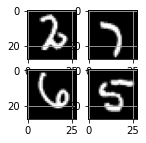

In [3]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [4]:
# one-hot coding을 위한 라이브러리 불러오기
from tensorflow.keras.utils import to_categorical, plot_model
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


In [5]:
import os
import datetime
#logs_dir="./logs_1"
logs_dir="logs_1" # 현재 이 파일이 있는 폴더에 "logs_1"이름의 파일이 만들어짐
os.makedirs(logs_dir, exist_ok=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


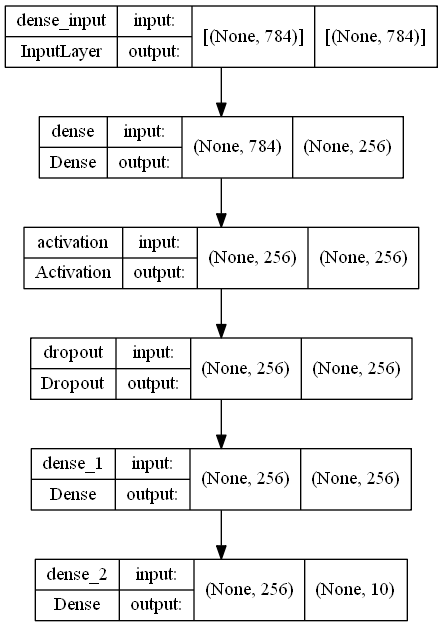

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,show_shapes=True)

In [7]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [8]:
logdir=os.path.join(logs_dir,datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_cb=tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val),
                  callbacks=[tensorboard_cb])
history_out=history.history
history_out.keys()

Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 0.3342 - accuracy: 0.8984 - val_loss: 0.1386 - val_accuracy: 0.9580
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1659 - accuracy: 0.9483 - val_loss: 0.1056 - val_accuracy: 0.9679
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1298 - accuracy: 0.9598 - val_loss: 0.0920 - val_accuracy: 0.9730
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1130 - accuracy: 0.9649 - val_loss: 0.0795 - val_accuracy: 0.9760
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0995 - accuracy: 0.9677 - val_loss: 0.0820 - val_accuracy: 0.9746
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0892 - accuracy: 0.9708 - val_loss: 0.0788 - val_accuracy: 0.9771
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0782 - accuracy: 0.9754 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1. "localhost에서 연결을 거부했습니다" 메시지 나올 경우 --port 뒤의 포트 번호 변경 (8001, 8002 등)
2. "Launching TensorBoard..." 메시지 나올 경우 인터넷 주소창에 "localhost:xxxx" (xxxx는 지정한 포트번호) 입력

이거 오류나면 그냥 안봐도됨 안중요함. 도움안됨.

In [9]:
%reload_ext tensorboard
%tensorboard --logdir {logs_dir} --port=8889

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

check_list=[EarlyStopping(monitor='loss', patience=2), ModelCheckpoint(filepath='./model.h5',monitor='val_accuracy',
                                                                          save_best_only='True')]
            
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val),callbacks=check_list)

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0900 - val_accuracy: 0.9825
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 0.0796 - val_accuracy: 0.9834
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0786 - val_accuracy: 0.9851
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.0812 - val_accuracy: 0.9829
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0835 - val_accuracy: 0.9829


In [38]:
# 저장한 모델 불러와서 사용하기
weights=model.load_weights(filepath='./model.h5') # model.save 해도됨
print(weights)

None


In [ ]:
# 모델 저장하는 방법 2가지, 결과는 같음
model.save('path/to/location.h5') # 모델전체
model.save_weights('path/to/location.h5') #모델 가중치만 저장 

In [ ]:
# 모델 불러오기
from tensorflow import keras 
model = keras.models.load_model('path/to/location.h5')
model = keras.models.load_weights('path/to/location.h5')